In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [5]:
df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00831,"CK_Superior Planets Lines and Motion, CK_Venus...",http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1488,nan
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00495,CK_Superior Planets Proportional Minutes,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1488,nan
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00158,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1488,nan
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02184,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/730...,Disputationum contra Cremonensia,"Original Part, Content",103,Venice,1488,nan
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01047,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/730...,Disputationum contra Cremonensia,"Original Part, Content",103,Venice,1488,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
20865,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02248,CK_Equinoctial,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,1599,nan
20866,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01709,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,1599,nan
20867,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01892,CK_Multiple Celestial Circles,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,1599,nan
20868,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01517,CK_Terrestrial Coordinates,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,1599,nan


In [6]:
excel_file_path = 'C:\\Users\\nogas\\Image_data\\celestial_circles.xlsx'
excel_data = pd.read_excel(excel_file_path)
df_1 = pd.merge(df, excel_data, on='cluster_name', how='left')
df_1

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,multiple moments,multiple perspectives,color,multiple circles,"decorated or stars, tail, scales",picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00831,"CK_Superior Planets Lines and Motion, CK_Venus...",http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00495,CK_Superior Planets Proportional Minutes,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00158,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02184,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/730...,Disputationum contra Cremonensia,"Original Part, Content",103,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01047,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/730...,Disputationum contra Cremonensia,"Original Part, Content",103,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02248,CK_Equinoctial,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,yes,no,no,no,no,no
20866,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01709,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,no,no,no
20867,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01892,CK_Multiple Celestial Circles,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,yes,no,no,no,no,no,no
20868,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01517,CK_Terrestrial Coordinates,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Path to the Excel files
excel_file_path_1 = 'C:\\Users\\nogas\\Image_data\\corrected_celestial_circles.xlsx'
# Load the Excel files into DataFrames
excel_data_1 = pd.read_excel(excel_file_path_1)
# Assuming df is defined earlier in your code
df_full = pd.merge(df_1, excel_data_1, on='cluster_name', how='left')

In [8]:
df_full

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,multiple circles,"decorated or stars, tail, scales",picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol,3D decoration,3D main point,Unnamed: 3
0,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00831,"CK_Superior Planets Lines and Motion, CK_Venus...",http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00495,CK_Superior Planets Proportional Minutes,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00158,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02184,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/730...,Disputationum contra Cremonensia,"Original Part, Content",103,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01047,CK_Mercury Lines and Motion,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/730...,Disputationum contra Cremonensia,"Original Part, Content",103,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20865,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02248,CK_Equinoctial,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,yes,no,no,no,no,no,no,yes,NaN
20866,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01709,CK_Zodiac,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,no,yes,NaN
20867,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01892,CK_Multiple Celestial Circles,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,yes,no,no,no,no,no,no,yes,yes,NaN
20868,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01517,CK_Terrestrial Coordinates,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2362125266.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horizon_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Horizon'))
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2362125266.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  horizon_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Horizon'))
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2362125266.py:23: FutureWar

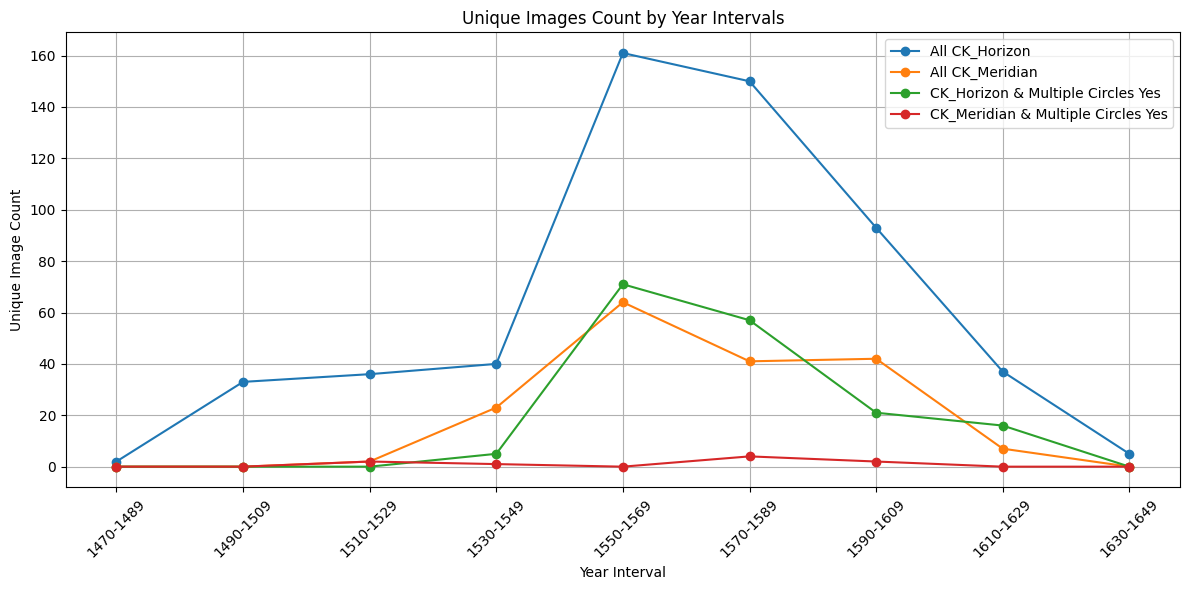

In [9]:
# Ensure the year column is of integer type
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(df_full, keyword):
    return df_full[df_full['cks'].str.contains(keyword, na=False)]['images'].nunique()

def count_unique_images_multiple(df_full, keyword):
    return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df_full['multiple circles'] == 'yes')]['images'].nunique()

# Prepare data for plotting
horizon_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Horizon'))
meridian_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Meridian'))
horizon_multiple_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images_multiple(x, 'CK_Horizon'))
meridian_multiple_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images_multiple(x, 'CK_Meridian'))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', label='All CK_Horizon')
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', label='All CK_Meridian')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', label='CK_Horizon & Multiple Circles Yes')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', label='CK_Meridian & Multiple Circles Yes')

# Customizing the plot
plt.title('Unique Images Count by Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3026250296.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  horizon_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Horizon'))
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3026250296.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  horizon_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Horizon'))
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3026250296.py:23: FutureWar

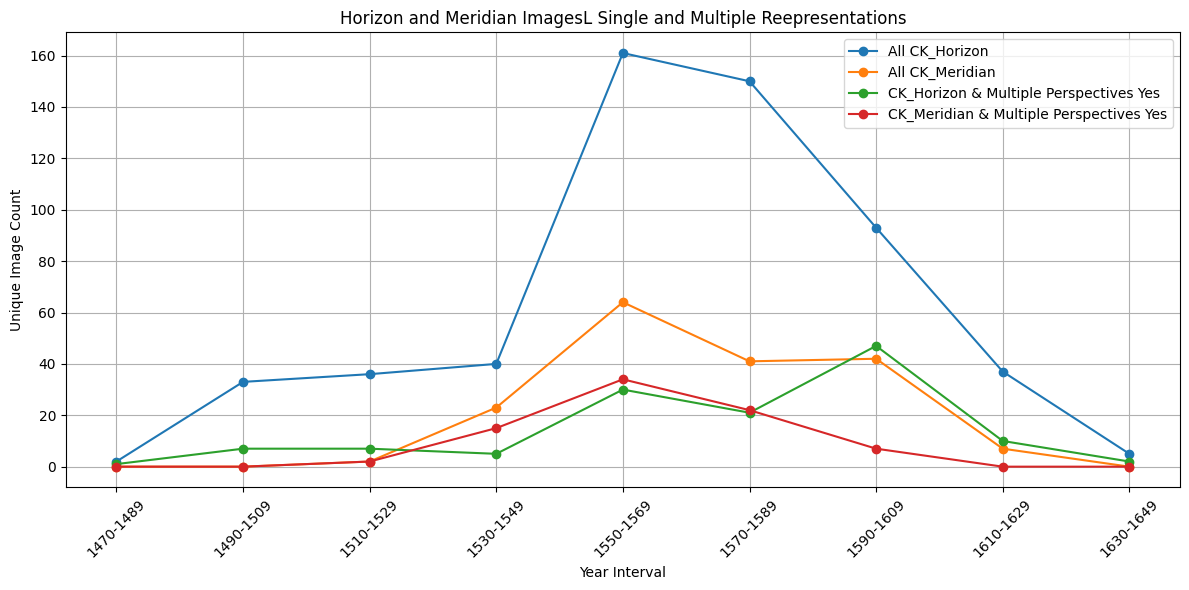

In [10]:
# Ensure the year column is of integer type
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(df_full, keyword):
    return df_full[df_full['cks'].str.contains(keyword, na=False)]['images'].nunique()

def count_unique_images_multiple(df_full, keyword):
    return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df_full['multiple perspectives'] == 'yes')]['images'].nunique()

# Prepare data for plotting
horizon_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Horizon'))
meridian_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images(x, 'CK_Meridian'))
horizon_multiple_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images_multiple(x, 'CK_Horizon'))
meridian_multiple_counts = df_full.groupby('year_interval').apply(lambda x: count_unique_images_multiple(x, 'CK_Meridian'))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', label='All CK_Horizon')
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', label='All CK_Meridian')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', label='CK_Horizon & Multiple Perspectives Yes')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', label='CK_Meridian & Multiple Perspectives Yes')

# Customizing the plot
plt.title('Horizon and Meridian ImagesL Single and Multiple Reepresentations')
plt.xlabel('Year Interval')
plt.ylabel('Unique Image Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

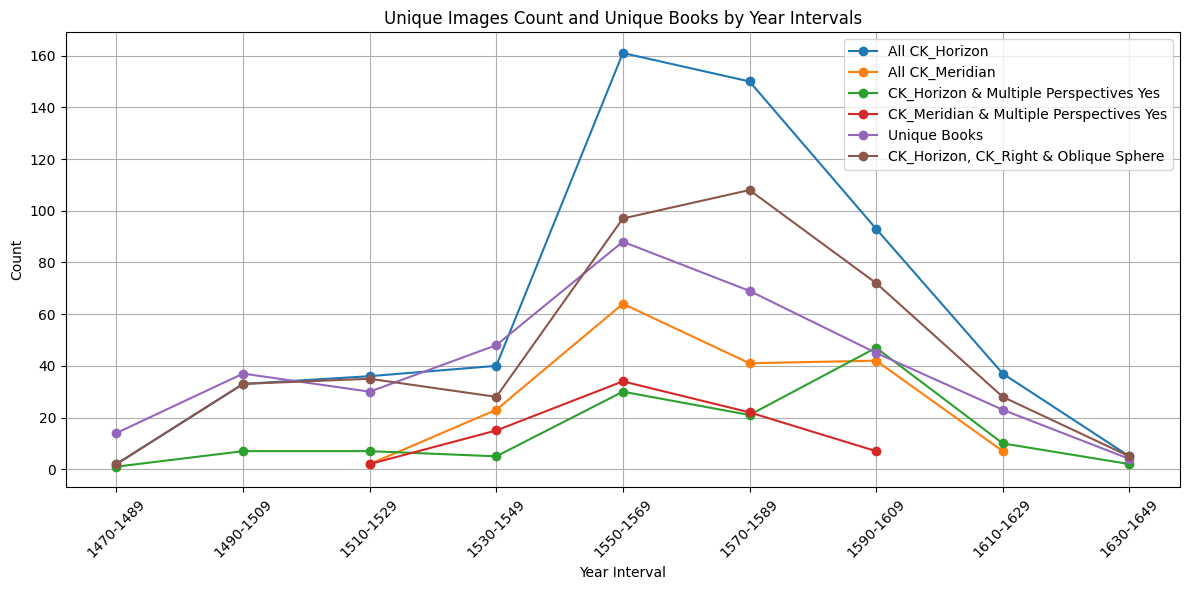

In [11]:
# Ensure the year column is of integer type for df_full
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals in df_full
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Ensure the year column is of integer type for books
books['year'] = books['year'].astype(int)  # Convert to integer

# Create a new column for year intervals in the books DataFrame
books['year_interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(df, keyword):
    return df_full[df_full['cks'].str.contains(keyword, na=False)]['images'].nunique()

def count_unique_images_multiple(df, keyword):
    return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df['multiple perspectives'] == 'yes')]['images'].nunique()

# Prepare data for plotting
horizon_counts = df_full[df_full['cks'].str.contains('CK_Horizon', na=False)].groupby('year_interval', observed=True)['images'].nunique()
meridian_counts = df_full[df_full['cks'].str.contains('CK_Meridian', na=False)].groupby('year_interval', observed=True)['images'].nunique()
horizon_multiple_counts = df_full[(df_full['cks'].str.contains('CK_Horizon', na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval', observed=True)['images'].nunique()
meridian_multiple_counts = df_full[(df_full['cks'].str.contains('CK_Meridian', na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval', observed=True)['images'].nunique()

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()  # Ensure 'book_id' is correct

# Count unique images with both keywords in cks
combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    df_full['cks'].str.contains('CK_Right', na=False) & 
    df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', label='All CK_Horizon')
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', label='All CK_Meridian')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', label='CK_Horizon & Multiple Perspectives Yes')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', label='CK_Meridian & Multiple Perspectives Yes')
plt.plot(book_counts.index, book_counts.values, marker='o', label='Unique Books')
plt.plot(combined_counts.index, combined_counts.values, marker='o', label='CK_Horizon, CK_Right & Oblique Sphere')

# Customizing the plot
plt.title('Unique Images Count and Unique Books by Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

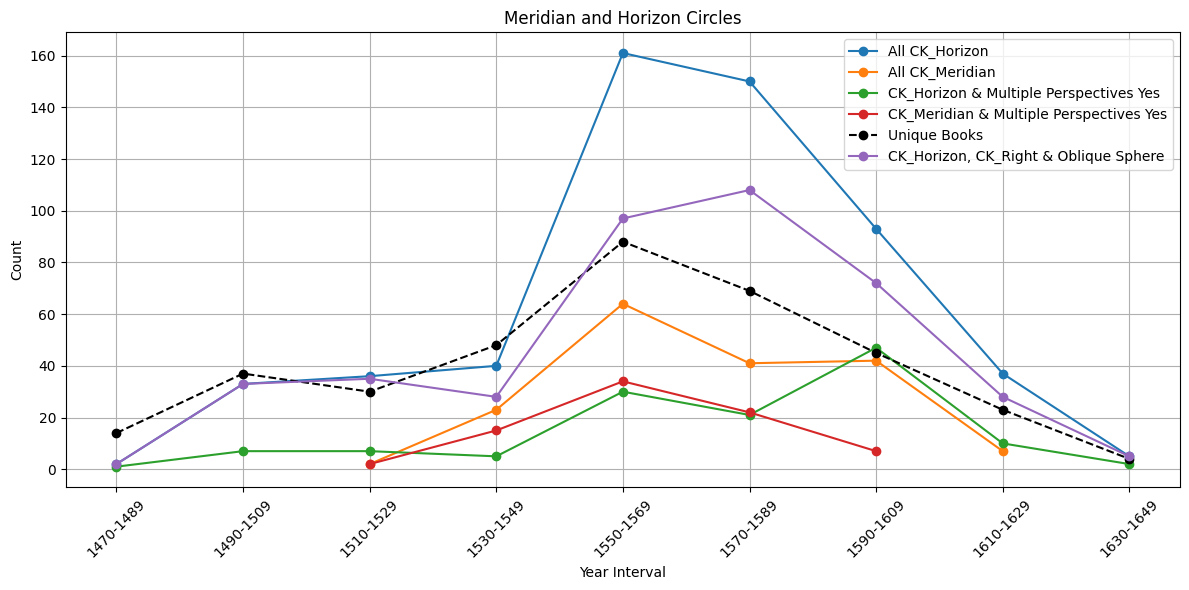

In [12]:
# Ensure the year column is of integer type for df_full
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals in df_full
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Ensure the year column is of integer type for books
books['year'] = books['year'].astype(int)  # Convert to integer

# Create a new column for year intervals in the books DataFrame
books['year_interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(df, keyword):
    return df[df['cks'].str.contains(keyword, na=False)]['images'].nunique()

def count_unique_images_multiple(df, keyword):
    return df[(df['cks'].str.contains(keyword, na=False)) & (df['multiple perspectives'] == 'Yes')]['images'].nunique()

# Prepare data for plotting
horizon_counts = df_full[df_full['cks'].str.contains('CK_Horizon', na=False)].groupby('year_interval', observed=True)['images'].nunique()
meridian_counts = df_full[df_full['cks'].str.contains('CK_Meridian', na=False)].groupby('year_interval', observed=True)['images'].nunique()
horizon_multiple_counts = df_full[(df_full['cks'].str.contains('CK_Horizon', na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval', observed=True)['images'].nunique()
meridian_multiple_counts = df_full[(df_full['cks'].str.contains('CK_Meridian', na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval', observed=True)['images'].nunique()

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()  # Ensure 'book' is correct

# Count unique images with both keywords in cks
combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    df_full['cks'].str.contains('CK_Right', na=False) & 
    df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', label='All CK_Horizon')
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', label='All CK_Meridian')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', label='CK_Horizon & Multiple Perspectives Yes')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', label='CK_Meridian & Multiple Perspectives Yes')

# Change the books line to a broken black line
plt.plot(book_counts.index, book_counts.values, linestyle='--', color='black', marker='o', label='Unique Books')

plt.plot(combined_counts.index, combined_counts.values, marker='o', label='CK_Horizon, CK_Right & Oblique Sphere')

# Customizing the plot
plt.title('Meridian and Horizon Circles')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

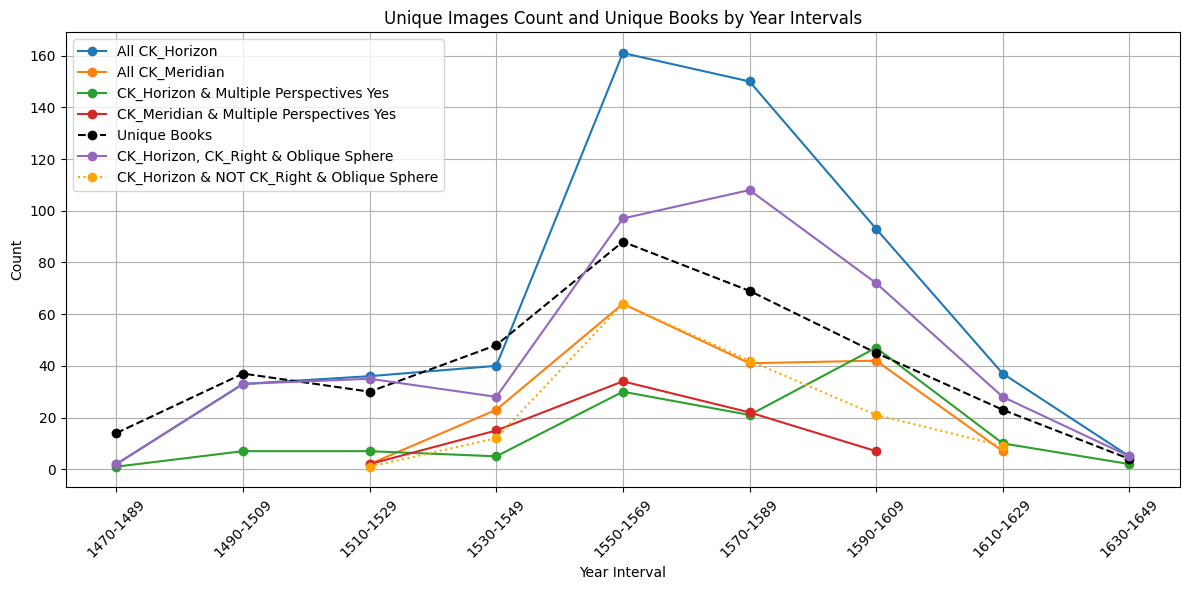

In [13]:
# Ensure the year column is of integer type for df_full
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals in df_full
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Ensure the year column is of integer type for books
books['year'] = books['year'].astype(int)  # Convert to integer

# Create a new column for year intervals in the books DataFrame
books['year_interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(df, keyword):
    return df[df['cks'].str.contains(keyword, na=False)]['images'].nunique()

def count_unique_images_multiple(df, keyword):
    return df[(df['cks'].str.contains(keyword, na=False)) & (df['multiple perspectives'] == 'yes')]['images'].nunique()

# Prepare data for plotting
horizon_counts = df_full[df_full['cks'].str.contains('CK_Horizon', na=False)].groupby('year_interval', observed=True)['images'].nunique()
meridian_counts = df_full[df_full['cks'].str.contains('CK_Meridian', na=False)].groupby('year_interval', observed=True)['images'].nunique()
horizon_multiple_counts = df_full[(df_full['cks'].str.contains('CK_Horizon', na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval', observed=True)['images'].nunique()
meridian_multiple_counts = df_full[(df_full['cks'].str.contains('CK_Meridian', na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval', observed=True)['images'].nunique()

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()  # Ensure 'book' is correct

# Count unique images with both keywords in cks
combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    df_full['cks'].str.contains('CK_Right', na=False) & 
    df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Count unique images with CK_Horizon that do NOT have CK_Right and Oblique Sphere
horizon_not_combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    ~df_full['cks'].str.contains('CK_Right', na=False) & 
    ~df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', label='All CK_Horizon')
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', label='All CK_Meridian')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', label='CK_Horizon & Multiple Perspectives Yes')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', label='CK_Meridian & Multiple Perspectives Yes')

# Change the books line to a broken black line
plt.plot(book_counts.index, book_counts.values, linestyle='--', color='black', marker='o', label='Unique Books')

plt.plot(combined_counts.index, combined_counts.values, marker='o', label='CK_Horizon, CK_Right & Oblique Sphere')

# New line for unique images with CK_Horizon that do NOT have CK_Right and Oblique Sphere
plt.plot(horizon_not_combined_counts.index, horizon_not_combined_counts.values, marker='o', linestyle=':', color='orange', label='CK_Horizon & NOT CK_Right & Oblique Sphere')

# Customizing the plot
plt.title('Unique Images Count and Unique Books by Year Intervals')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1499031004.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_full[df_full['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1499031004.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()


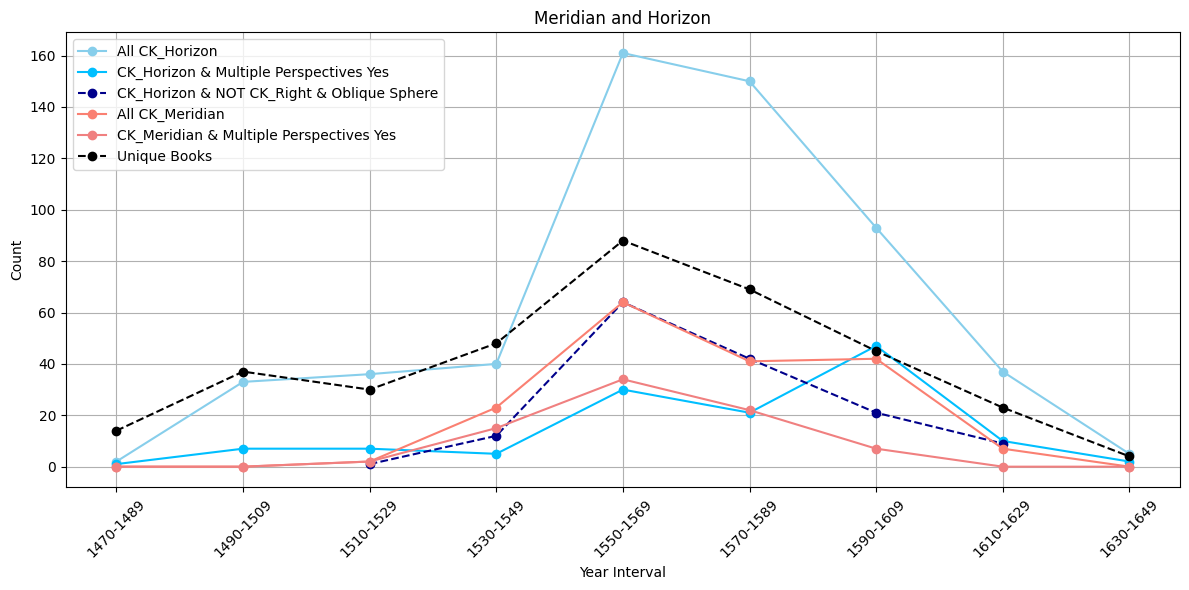

In [14]:
# Ensure the year column is of integer type for df_full
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals in df_full
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Ensure the year column is of integer type for books
books['year'] = books['year'].astype(int)  # Convert to integer

# Create a new column for year intervals in the books DataFrame
books['year_interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(keyword):
    return df_full[df_full['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()

def count_unique_images_multiple(keyword):
    return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()

# Prepare data for plotting
horizon_counts = count_unique_images('CK_Horizon')
meridian_counts = count_unique_images('CK_Meridian')
horizon_multiple_counts = count_unique_images_multiple('CK_Horizon')
meridian_multiple_counts = count_unique_images_multiple('CK_Meridian')

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()

# Count unique images with both keywords in cks
combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    df_full['cks'].str.contains('CK_Right', na=False) & 
    df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Count unique images with CK_Horizon that do NOT have CK_Right and Oblique Sphere
horizon_not_combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    ~df_full['cks'].str.contains('CK_Right', na=False) & 
    ~df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Plotting
plt.figure(figsize=(12, 6))

# Horizon related lines (similar colors)
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', color='skyblue', label='All CK_Horizon')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', color='deepskyblue', label='CK_Horizon & Multiple Perspectives Yes')
plt.plot(horizon_not_combined_counts.index, horizon_not_combined_counts.values, marker='o', linestyle='--', color='darkblue', label='CK_Horizon & NOT CK_Right & Oblique Sphere')

# Meridian related lines (more distinct colors)
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', color='salmon', label='All CK_Meridian')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', color='lightcoral', label='CK_Meridian & Multiple Perspectives Yes')

# Books line
plt.plot(book_counts.index, book_counts.values, marker='o', linestyle='--', color='black', label='Unique Books')

# Customizing the plot
plt.title('Meridian and Horizon')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2006830151.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_full[df_full['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2006830151.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()


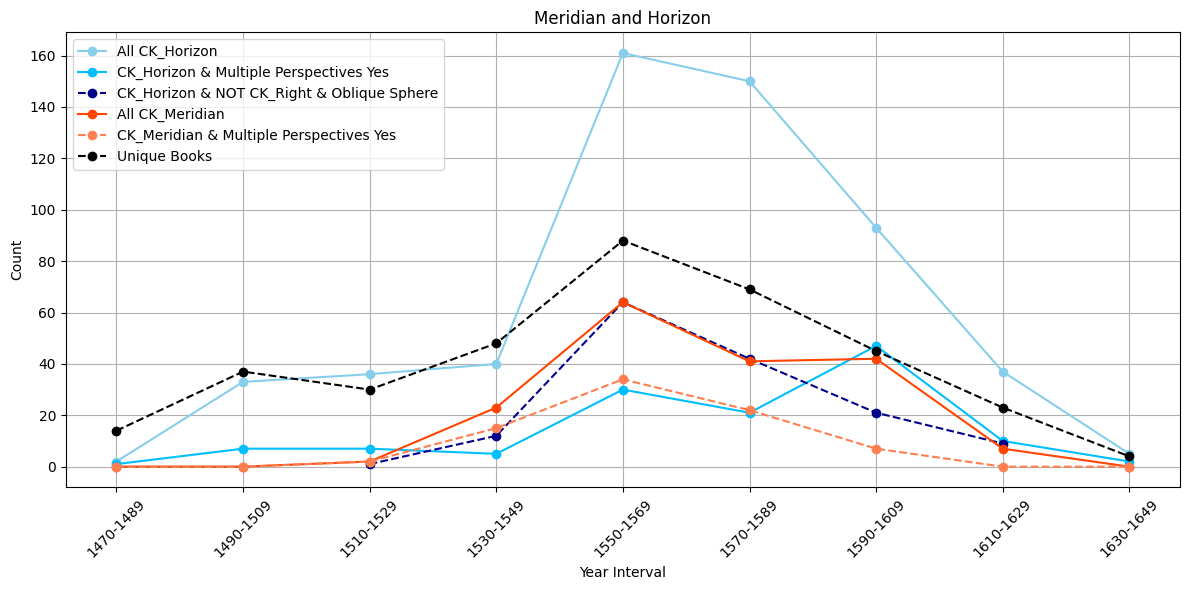

In [15]:
# Ensure the year column is of integer type for df_full
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals in df_full
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Ensure the year column is of integer type for books
books['year'] = books['year'].astype(int)  # Convert to integer

# Create a new column for year intervals in the books DataFrame
books['year_interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(keyword):
    return df_full[df_full['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()

def count_unique_images_multiple(keyword):
    return df_full[(df_full['cks'].str.contains(keyword, na=False)) & (df_full['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()

# Prepare data for plotting
horizon_counts = count_unique_images('CK_Horizon')
meridian_counts = count_unique_images('CK_Meridian')
horizon_multiple_counts = count_unique_images_multiple('CK_Horizon')
meridian_multiple_counts = count_unique_images_multiple('CK_Meridian')

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()

# Count unique images with both keywords in cks
combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    df_full['cks'].str.contains('CK_Right', na=False) & 
    df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Count unique images with CK_Horizon that do NOT have CK_Right and Oblique Sphere
horizon_not_combined_counts = df_full[
    df_full['cks'].str.contains('CK_Horizon', na=False) & 
    ~df_full['cks'].str.contains('CK_Right', na=False) & 
    ~df_full['cks'].str.contains('Oblique Sphere', na=False)
].groupby('year_interval', observed=True)['images'].nunique()

# Plotting
plt.figure(figsize=(12, 6))

# Horizon related lines (similar colors)
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', color='skyblue', label='All CK_Horizon')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', color='deepskyblue', label='CK_Horizon & Multiple Perspectives Yes')
plt.plot(horizon_not_combined_counts.index, horizon_not_combined_counts.values, marker='o', linestyle='--', color='darkblue', label='CK_Horizon & NOT CK_Right & Oblique Sphere')

# Meridian related lines (more distinct colors and styles)
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', color='orangered', linestyle='-', label='All CK_Meridian')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', color='coral', linestyle='--', label='CK_Meridian & Multiple Perspectives Yes')

# Books line
plt.plot(book_counts.index, book_counts.values, marker='o', linestyle='--', color='black', label='Unique Books')

# Customizing the plot
plt.title('Meridian and Horizon')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1290215020.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1290215020.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[(df['cks'].str.contains(keyword, na=False)) & (df['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()


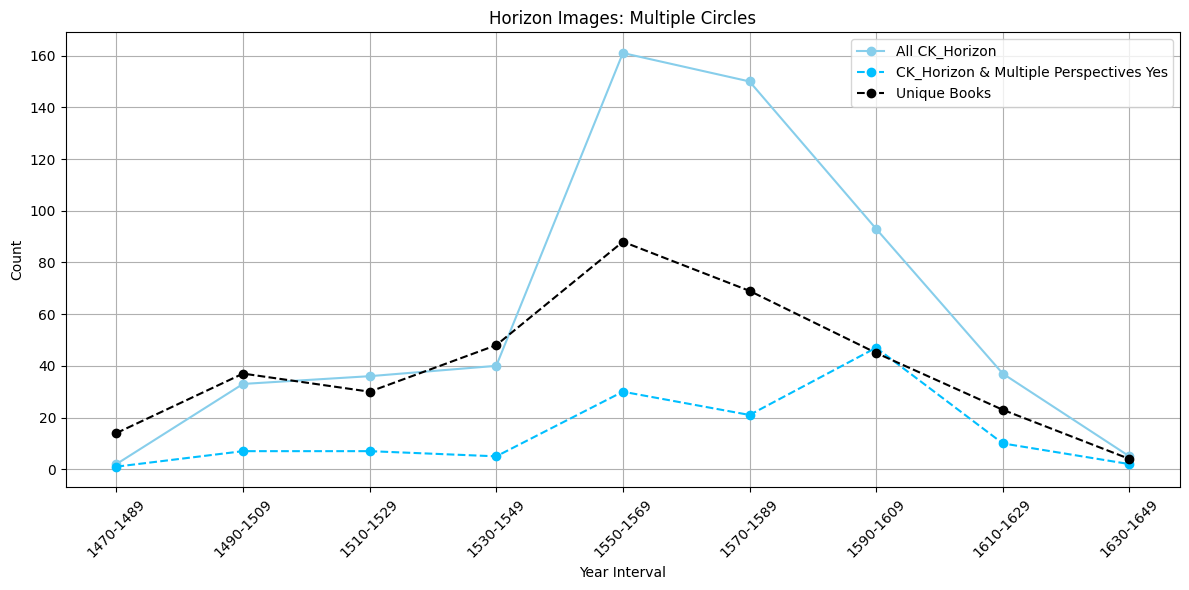

In [33]:

# Ensure the year column is of integer type for df_full
df_full['year'] = df_full['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Create a new column for year intervals in df_full
df_full['year_interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Ensure the year column is of integer type for books
books['year'] = books['year'].astype(int)  # Convert to integer

# Create a new column for year intervals in the books DataFrame
books['year_interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images based on conditions
def count_unique_images(df, keyword):
    return df[df['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()

def count_unique_images_multiple(df, keyword):
    return df[(df['cks'].str.contains(keyword, na=False)) & (df['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()

# Prepare data for plotting Horizon images
horizon_counts = count_unique_images(df_full, 'CK_Horizon')
horizon_multiple_counts = count_unique_images_multiple(df_full, 'CK_Horizon')

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()

# Plotting Horizon related lines
plt.figure(figsize=(12, 6))

# Plot horizon related counts
plt.plot(horizon_counts.index, horizon_counts.values, marker='o', color='skyblue', label='All CK_Horizon')
plt.plot(horizon_multiple_counts.index, horizon_multiple_counts.values, marker='o', linestyle='--', color='deepskyblue', label='CK_Horizon & Multiple Perspectives Yes')

# Books line
plt.plot(book_counts.index, book_counts.values, marker='o', linestyle='--', color='black', label='Unique Books')

# Customizing the plot
plt.title('Horizon Images: Multiple Circles')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1555226998.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df['cks'].str.contains(keyword, na=False)].groupby('year_interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1555226998.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[(df['cks'].str.contains(keyword, na=False)) & (df['multiple perspectives'] == 'yes')].groupby('year_interval')['images'].nunique()


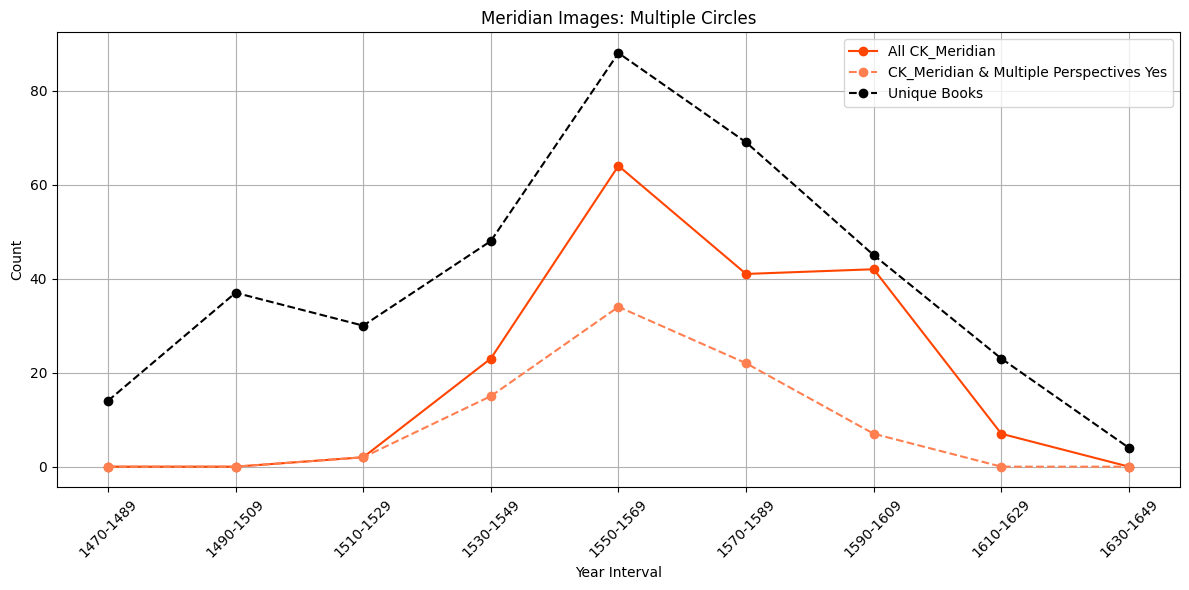

In [32]:
# Prepare data for plotting Meridian images
meridian_counts = count_unique_images(df_full, 'CK_Meridian')
meridian_multiple_counts = count_unique_images_multiple(df_full, 'CK_Meridian')

# Count unique book values from the "books" DataFrame
book_counts = books.groupby('year_interval', observed=True)['book'].nunique()

# Plotting Meridian related lines
plt.figure(figsize=(12, 6))

# Plot meridian related counts
plt.plot(meridian_counts.index, meridian_counts.values, marker='o', color='orangered', label='All CK_Meridian')
plt.plot(meridian_multiple_counts.index, meridian_multiple_counts.values, marker='o', linestyle='--', color='coral', label='CK_Meridian & Multiple Perspectives Yes')

# Books line
plt.plot(book_counts.index, book_counts.values, marker='o', linestyle='--', color='black', label='Unique Books')

# Customizing the plot
plt.title('Meridian Images: Multiple Circles')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# Filter the DataFrame
filtered_df = df_full[df_full['cks'].str.contains('CK_Horizon|CK_Meridian|CK_Elevation of the Pole', na=False)]
filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol,3D decoration,3D main point,Unnamed: 3,year_interval,interval
35,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01158,"CK_Horizon, CK_Right and Oblique Sphere",http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,...,no,no,no,no,no,no,no,NaN,1470-1489,1470-1489
150,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00849,CK_Elevation of the Pole,http://sphaera.mpiwg-berlin.mpg.de/id/item/3ba...,1632,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Leipzig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490-1509,1490-1509
244,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01971,"CK_Horizon, CK_Right and Oblique Sphere, CK_Su...",http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,...,no,no,no,no,no,no,no,NaN,1490-1509,1490-1509
299,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00849,CK_Elevation of the Pole,http://sphaera.mpiwg-berlin.mpg.de/id/item/116...,2200,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1470-1489,1470-1489
323,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01971,"CK_Horizon, CK_Right and Oblique Sphere, CK_Su...",http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Ferrara,...,no,no,no,no,no,no,no,NaN,1470-1489,1470-1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20851,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02232,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609
20852,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03527,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609
20854,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01676,CK_Elevation of the Pole,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590-1609,1590-1609
20855,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03546,CK_Horizon,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609


C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3329040823.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3329040823.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3329040823.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to T

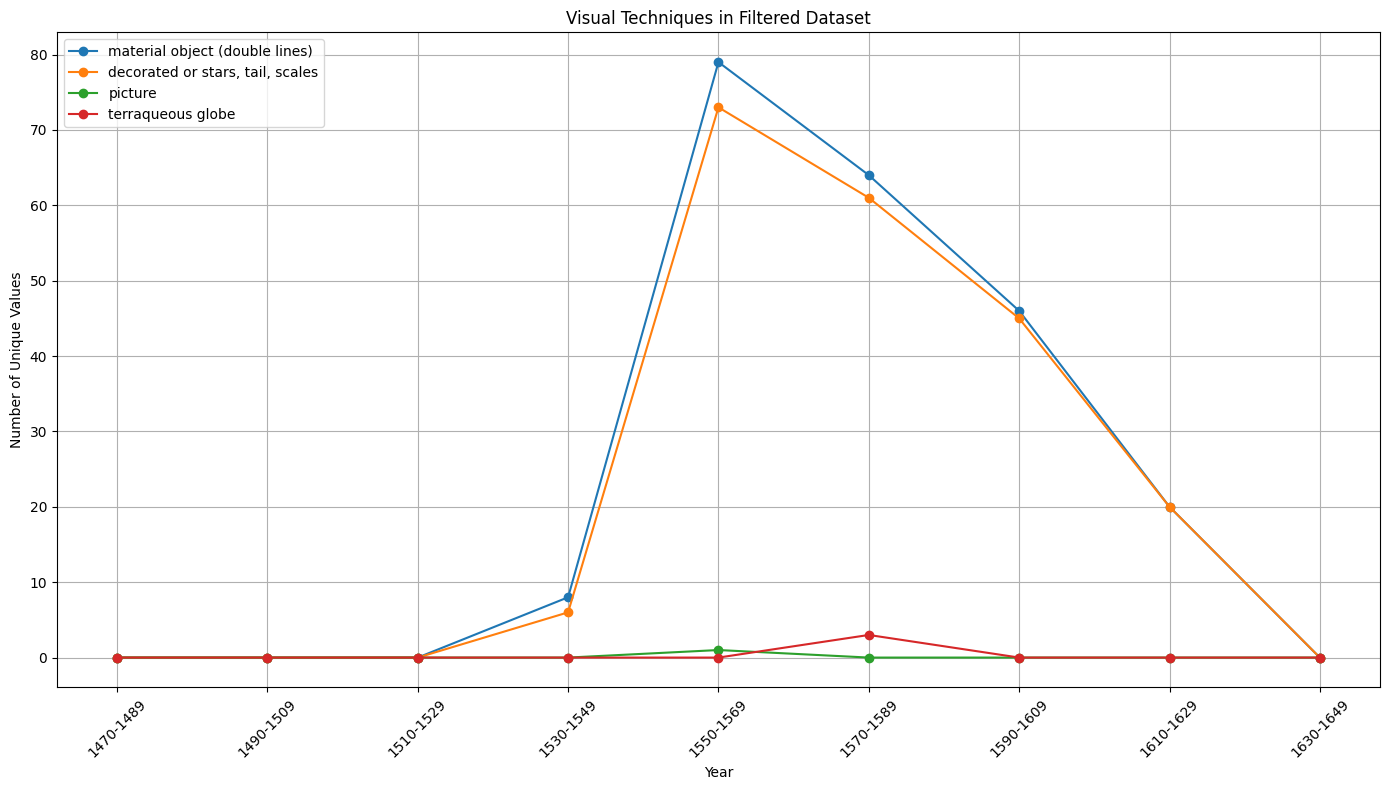

In [36]:

# Define the columns you want to analyze
columns_to_analyze = [
    'material object (double lines)',
    'decorated or stars, tail, scales',
    'picture',
    'terraqueous globe'
]

# Create a new column for the intervals (if needed)
# Example: bins and labels (adjust as necessary)
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the intervals based on a hypothetical 'year' column
# Make sure to adapt this based on your actual DataFrame structure
if 'year' in filtered_df.columns:
    filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_count = filtered_df[filtered_df[column_name] == value]
    return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data for the specified columns
data_to_plot = {}
for column in columns_to_analyze:
    data_to_plot[column] = count_unique_images_by_column(column, 'yes')

# Combine the data into a DataFrame
side_by_side_data = pd.DataFrame(data_to_plot)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# If you have total unique images or books to plot, add them here (optional)
# total_unique_images = filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
# ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Visual Techniques in Filtered Dataset')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2214817527.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2214817527.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\2214817527.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to T

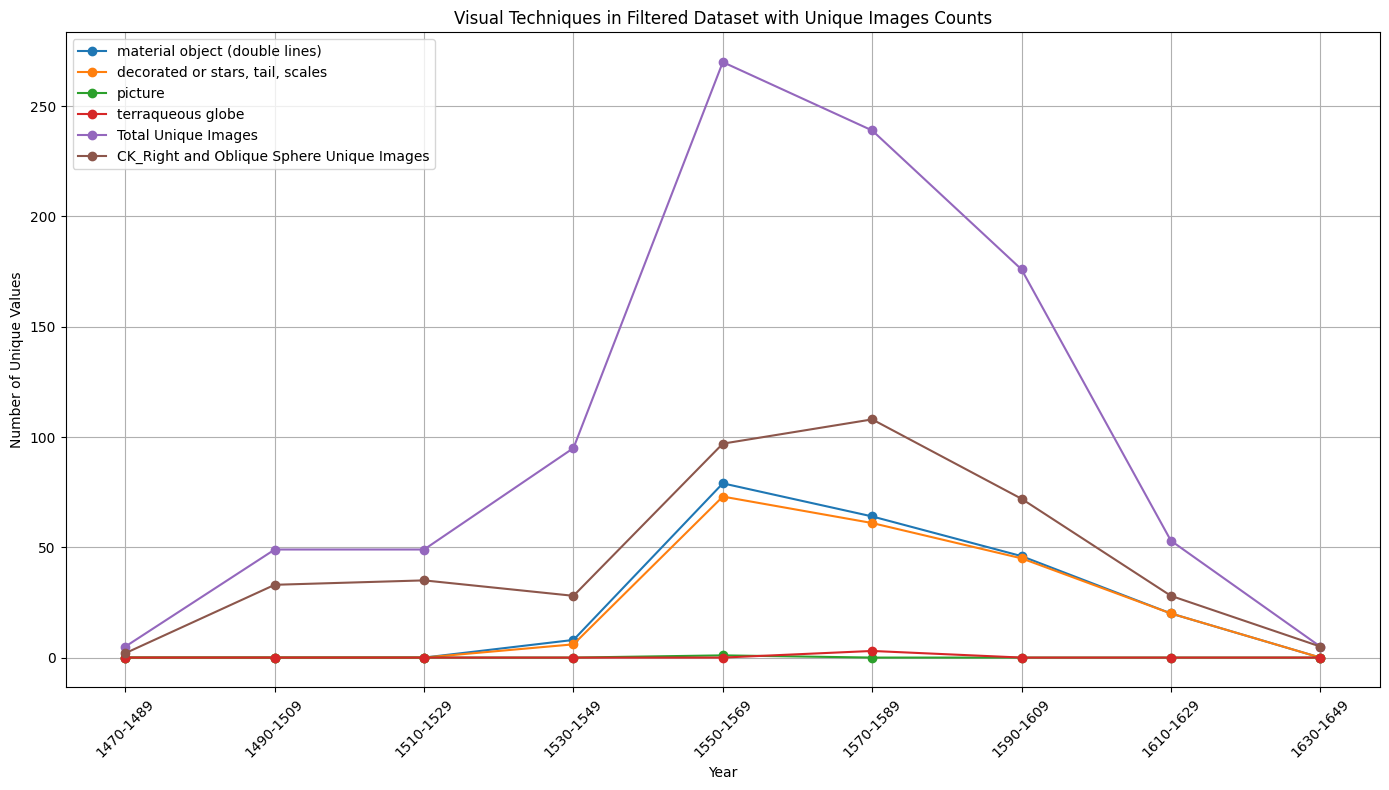

In [37]:

# Define the columns you want to analyze
columns_to_analyze = [
    'material object (double lines)',
    'decorated or stars, tail, scales',
    'picture',
    'terraqueous globe'
]

# Create a new column for the intervals (if needed)
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

if 'year' in filtered_df.columns:
    filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_count = filtered_df[filtered_df[column_name] == value]
    return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data for the specified columns
data_to_plot = {}
for column in columns_to_analyze:
    data_to_plot[column] = count_unique_images_by_column(column, 'yes')

# Calculate total unique images and images with specific cks value
total_unique_images = filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
ck_right_oblique_sphere_count = filtered_df[filtered_df['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]
ck_right_oblique_sphere_unique = ck_right_oblique_sphere_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Combine the data into a DataFrame
side_by_side_data = pd.DataFrame(data_to_plot)
side_by_side_data['Total Unique Images'] = total_unique_images
side_by_side_data['CK_Right and Oblique Sphere Unique Images'] = ck_right_oblique_sphere_unique

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Visual Techniques in Filtered Dataset with Unique Images Counts')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
filtered_df_no_ck = filtered_df[~filtered_df['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]
filtered_df_no_ck

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol,3D decoration,3D main point,Unnamed: 3,year_interval,interval
925,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02046,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/13e...,1929,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Francesco Capuano's second commentary on the T...,"Annotated, Content",951,Venice,...,no,no,yes,no,no,no,no,NaN,1510-1529,1510-1529
1289,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02375,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/608...,1941,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Francesco Capuano's second commentary on the T...,"Annotated, Content",951,Venice,...,no,no,yes,no,no,no,no,NaN,1530-1549,1530-1549
1320,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03439,"CK_Geometric Demonstrations for Instruments, C...",http://sphaera.mpiwg-berlin.mpg.de/id/item/608...,1941,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",408,Venice,...,no,no,yes,no,no,NaN,NaN,NaN,1530-1549,1530-1549
2424,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02046,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/814...,1659,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Francesco Capuano's second commentary on the T...,"Annotated, Content",951,Venice,...,no,no,yes,no,no,no,no,NaN,1510-1529,1510-1529
2941,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02224,CK_Horizon,http://sphaera.mpiwg-berlin.mpg.de/id/item/ceb...,2092,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Theoricae novae planetarum of Peuerbach,"Annotated, Content",320,Milan,...,no,no,no,no,no,no,no,NaN,1510-1529,1510-1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20850,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01776,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609
20851,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02232,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609
20852,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03527,"CK_Celestial Coordinates, CK_Meridian",http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609
20855,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_03546,CK_Horizon,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,2279,http://sphaera.mpiwg-berlin.mpg.de/id/part/acd...,Second part of the Sphere treatise of Thomas Hill,"Original Part, Content",929,London,...,no,no,no,no,no,no,no,NaN,1590-1609,1590-1609


C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3736805310.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_ck['interval'] = pd.cut(filtered_df_no_ck['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3736805310.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3736805310.py:21: FutureWarning: The default of observed=False is deprecated and will be 

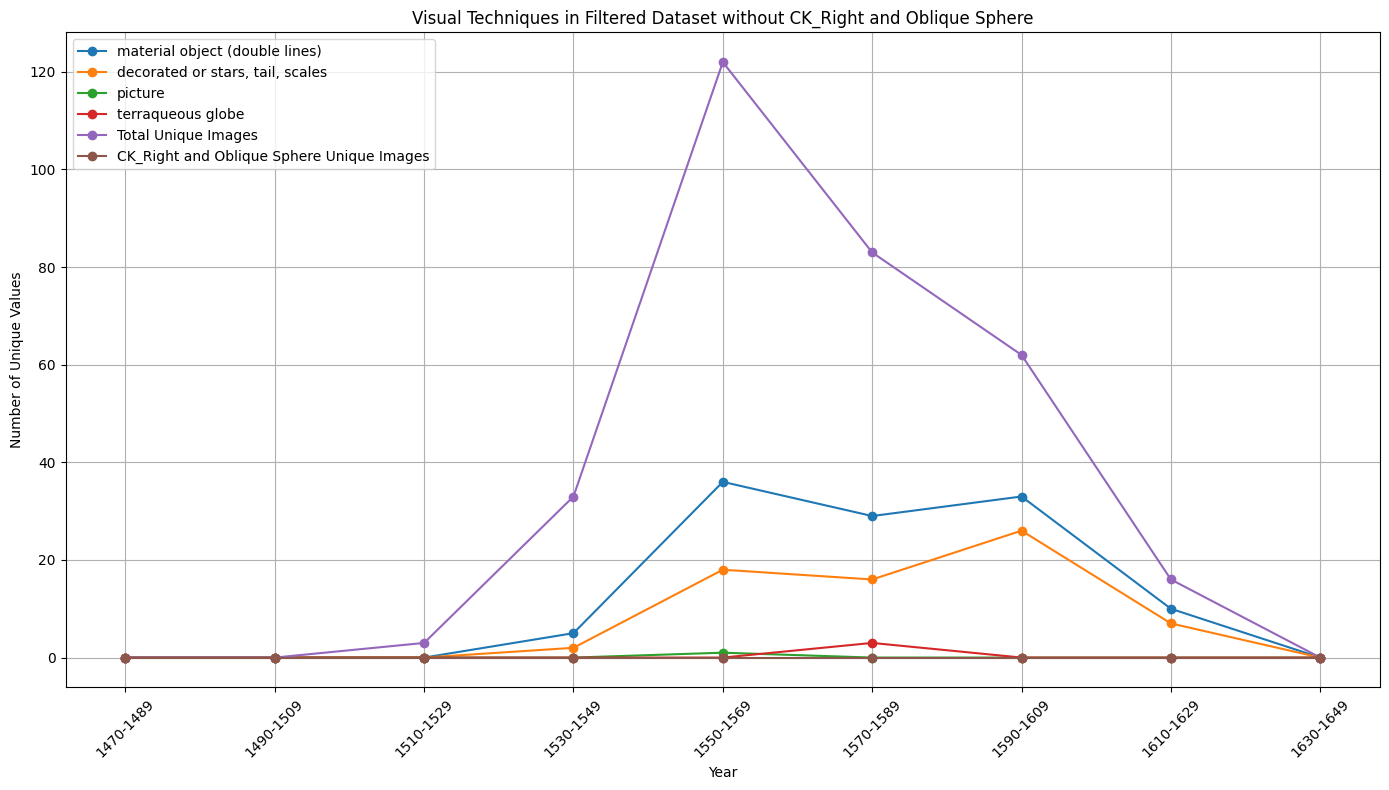

In [20]:
filtered_df_no_ck = filtered_df[~filtered_df['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# Define the columns you want to analyze
columns_to_analyze = [
    'material object (double lines)',
    'decorated or stars, tail, scales',
    'picture',
    'terraqueous globe'
]

# Create a new column for the intervals (if needed)
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

if 'year' in filtered_df_no_ck.columns:
    filtered_df_no_ck['interval'] = pd.cut(filtered_df_no_ck['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_count = filtered_df_no_ck[filtered_df_no_ck[column_name] == value]
    return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data for the specified columns
data_to_plot = {}
for column in columns_to_analyze:
    data_to_plot[column] = count_unique_images_by_column(column, 'yes')

# Calculate total unique images and images with specific cks value
total_unique_images = filtered_df_no_ck.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
ck_right_oblique_sphere_count = filtered_df_no_ck[filtered_df_no_ck['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]
ck_right_oblique_sphere_unique = ck_right_oblique_sphere_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Combine the data into a DataFrame
side_by_side_data = pd.DataFrame(data_to_plot)
side_by_side_data['Total Unique Images'] = total_unique_images
side_by_side_data['CK_Right and Oblique Sphere Unique Images'] = ck_right_oblique_sphere_unique

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Visual Techniques in Filtered Dataset without CK_Right and Oblique Sphere')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1163116513.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_ck['interval'] = pd.cut(filtered_df_no_ck['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1163116513.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1163116513.py:27: FutureWarning: The default of observed=False is deprecated and will be 

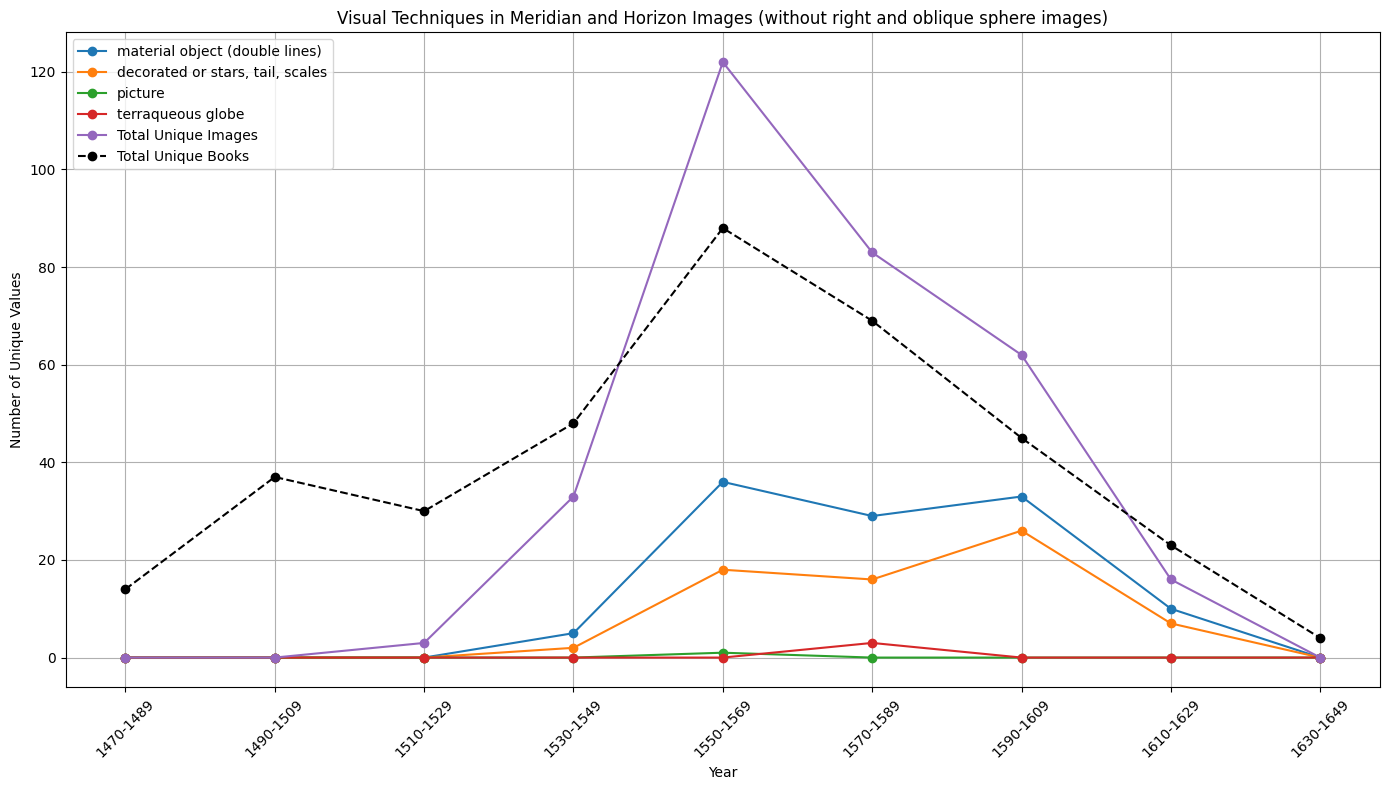

In [21]:

# Step 1: Filter out images with "CK_Right and Oblique Sphere"
filtered_df_no_ck = filtered_df[~filtered_df['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# Step 2: Define the columns you want to analyze
columns_to_analyze = [
    'material object (double lines)',
    'decorated or stars, tail, scales',
    'picture',
    'terraqueous globe'
]

# Step 3: Create bins and labels for the intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Step 4: Create intervals in the filtered_df_no_ck
if 'year' in filtered_df_no_ck.columns:
    filtered_df_no_ck['interval'] = pd.cut(filtered_df_no_ck['year'], bins=bins, labels=labels, right=False)

# Step 5: Create intervals in the books DataFrame
if 'year' in books.columns:
    books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_count = filtered_df_no_ck[filtered_df_no_ck[column_name] == value]
    return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Step 6: Collect data for the specified columns
data_to_plot = {}
for column in columns_to_analyze:
    data_to_plot[column] = count_unique_images_by_column(column, 'yes')

# Step 7: Calculate total unique images
total_unique_images = filtered_df_no_ck.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Step 8: Calculate total unique books
total_unique_books = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Step 9: Combine the data into a DataFrame
side_by_side_data = pd.DataFrame(data_to_plot)
side_by_side_data['Total Unique Images'] = total_unique_images
side_by_side_data['Total Unique Books'] = total_unique_books

# Step 10: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Step 11: Plot lines for each category
for column in side_by_side_data.columns:
    if column == 'Total Unique Books':
        ax.plot(labels, side_by_side_data[column], marker='o', linestyle='--', color='black', label=column)  # Broken black line
    else:
        ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Step 12: Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Visual Techniques in Meridian and Horizon Images (without right and oblique sphere images)')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1713283903.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_horizon['interval'] = pd.cut(filtered_df_horizon['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1713283903.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\1713283903.py:28: FutureWarning: The default of observed=False is deprecated and will

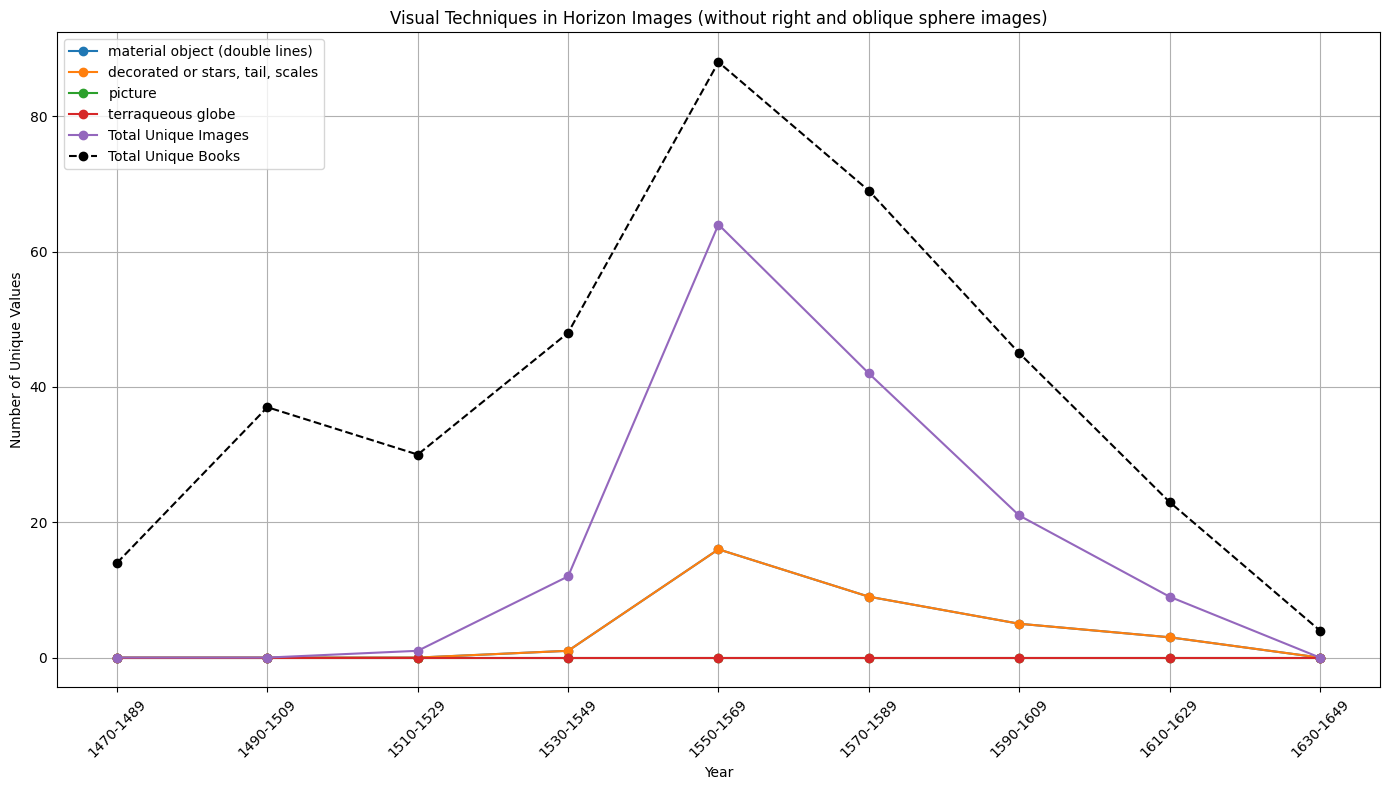

In [34]:
# Step 1: Filter out images with "CK_Right and Oblique Sphere" and keep only "CK_Horizon"
filtered_df_horizon = filtered_df[filtered_df['cks'].str.contains('CK_Horizon') & 
                                   ~filtered_df['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# Step 2: Define the columns you want to analyze
columns_to_analyze = [
    'material object (double lines)',
    'decorated or stars, tail, scales',
    'picture',
    'terraqueous globe'
]

# Step 3: Create bins and labels for the intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Step 4: Create intervals in the filtered_df_horizon
if 'year' in filtered_df_horizon.columns:
    filtered_df_horizon['interval'] = pd.cut(filtered_df_horizon['year'], bins=bins, labels=labels, right=False)

# Step 5: Create intervals in the books DataFrame
if 'year' in books.columns:
    books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_count = filtered_df_horizon[filtered_df_horizon[column_name] == value]
    return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Step 6: Collect data for the specified columns
data_to_plot_horizon = {}
for column in columns_to_analyze:
    data_to_plot_horizon[column] = count_unique_images_by_column(column, 'yes')

# Step 7: Calculate total unique images
total_unique_images_horizon = filtered_df_horizon.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Step 8: Calculate total unique books
total_unique_books_horizon = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Step 9: Combine the data into a DataFrame
side_by_side_data_horizon = pd.DataFrame(data_to_plot_horizon)
side_by_side_data_horizon['Total Unique Images'] = total_unique_images_horizon
side_by_side_data_horizon['Total Unique Books'] = total_unique_books_horizon

# Step 10: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Step 11: Plot lines for each category
for column in side_by_side_data_horizon.columns:
    if column == 'Total Unique Books':
        ax.plot(labels, side_by_side_data_horizon[column], marker='o', linestyle='--', color='black', label=column)  # Broken black line
    else:
        ax.plot(labels, side_by_side_data_horizon[column], marker='o', linestyle='-', label=column)

# Step 12: Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Visual Techniques in Horizon Images (without right and oblique sphere images)')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3324241742.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3324241742.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3324241742.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

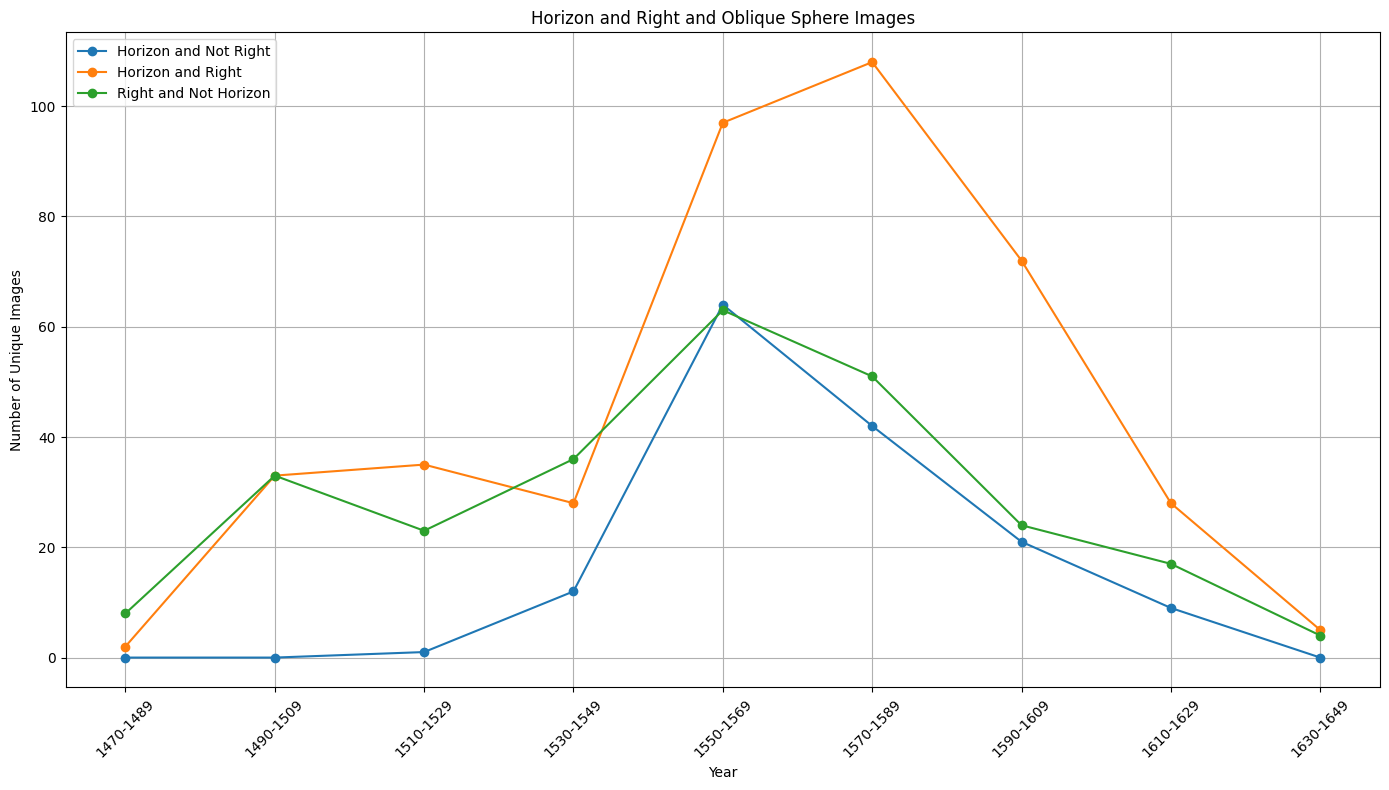

In [22]:

# Assuming df_full is already defined

# Step 1: Create bins and labels for the intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Step 2: Create intervals in the df_full
if 'year' in df_full.columns:
    df_full['interval'] = pd.cut(df_full['year'], bins=bins, labels=labels, right=False)

# Step 3: Filter for each condition
# 1. Unique images with "CK_Horizon" and not "CK_Right and Oblique Sphere"
horizon_not_right = df_full[df_full['cks'].str.contains('CK_Horizon') & 
                             ~df_full['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# 2. Unique images with both "CK_Horizon" and "CK_Right and Oblique Sphere"
horizon_and_right = df_full[df_full['cks'].str.contains('CK_Horizon') & 
                             df_full['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# 3. Unique images with "CK_Right and Oblique Sphere" and not "CK_Horizon"
right_not_horizon = df_full[~df_full['cks'].str.contains('CK_Horizon') & 
                             df_full['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# Step 4: Count unique images by interval for each condition
def count_unique_images(df):
    return df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

horizon_not_right_counts = count_unique_images(horizon_not_right)
horizon_and_right_counts = count_unique_images(horizon_and_right)
right_not_horizon_counts = count_unique_images(right_not_horizon)

# Step 5: Combine the data into a DataFrame for plotting
side_by_side_data = pd.DataFrame({
    'Horizon and Not Right': horizon_not_right_counts,
    'Horizon and Right': horizon_and_right_counts,
    'Right and Not Horizon': right_not_horizon_counts
})

# Step 6: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Step 7: Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Step 8: Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Images')
ax.set_title('Horizon and Right and Oblique Sphere Images')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\544386507.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)


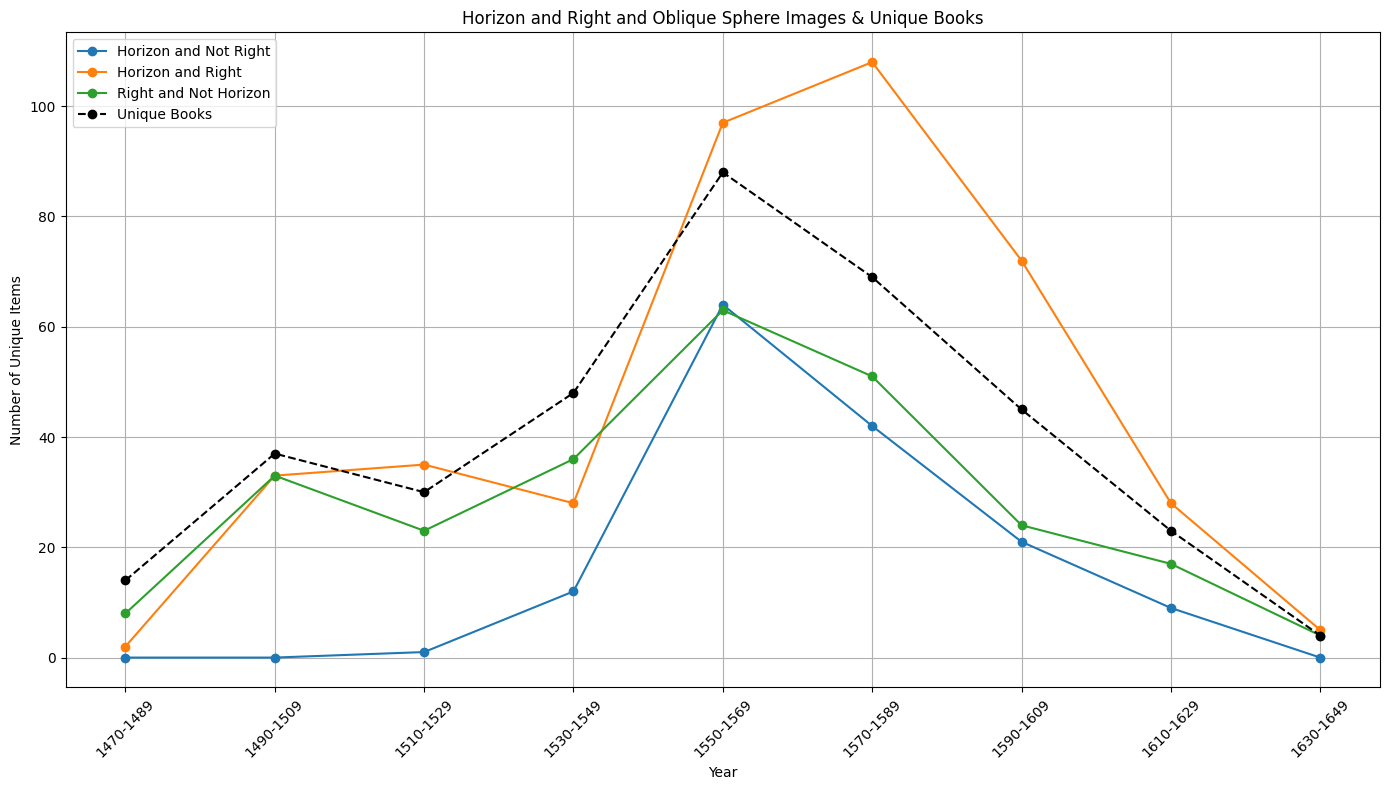

In [27]:
# Step 1: Count unique books by interval
if 'year' in books.columns:
    books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

def count_unique_books(df):
    return df.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Replace 'book_id' with the actual column name for unique book identifiers in your DataFrame
unique_books_counts = count_unique_books(books)

# Step 2: Combine the data into a DataFrame for plotting, including the books
side_by_side_data = pd.DataFrame({
    'Horizon and Not Right': horizon_not_right_counts,
    'Horizon and Right': horizon_and_right_counts,
    'Right and Not Horizon': right_not_horizon_counts,
    'Unique Books': unique_books_counts  # Add the unique books data here
})

# Step 3: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    if column == 'Unique Books':
        ax.plot(labels, side_by_side_data[column], marker='o', linestyle='--', color='black', label=column)  # Black dashed line for books
    else:
        ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Items')
ax.set_title('Horizon and Right and Oblique Sphere Images & Unique Books')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot only once
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3402886482.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_horizon['interval'] = pd.cut(filtered_df_horizon['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3402886482.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_10448\3402886482.py:30: FutureWarning: The default of observed=False is deprecated and will

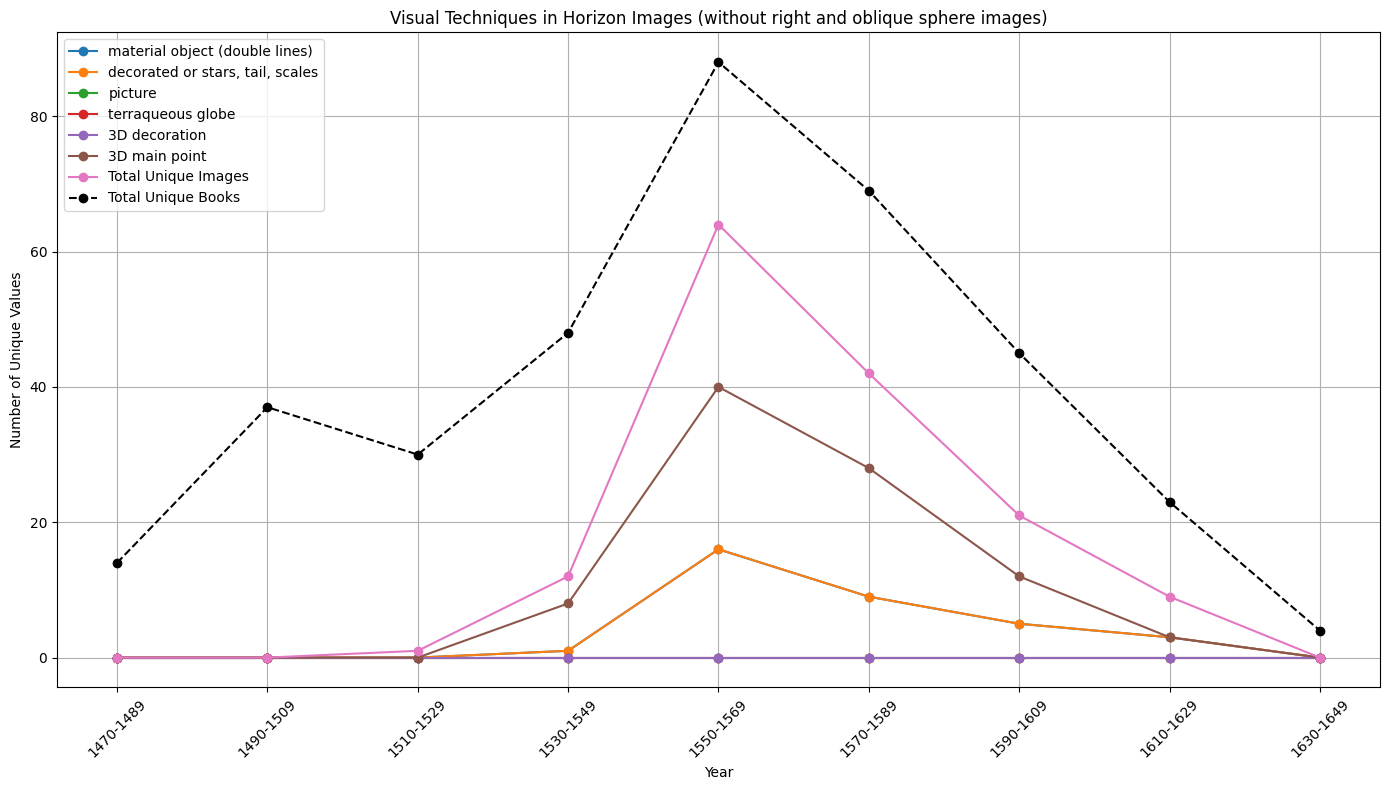

In [38]:
# Step 1: Filter out images with "CK_Right and Oblique Sphere" and keep only "CK_Horizon"
filtered_df_horizon = filtered_df[filtered_df['cks'].str.contains('CK_Horizon') & 
                                   ~filtered_df['cks'].str.contains('CK_Right and Oblique Sphere', na=False)]

# Step 2: Define the columns you want to analyze
columns_to_analyze = [
    'material object (double lines)',
    'decorated or stars, tail, scales',
    'picture',
    'terraqueous globe',
    '3D decoration',
    '3D main point'
]

# Step 3: Create bins and labels for the intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Step 4: Create intervals in the filtered_df_horizon
if 'year' in filtered_df_horizon.columns:
    filtered_df_horizon['interval'] = pd.cut(filtered_df_horizon['year'], bins=bins, labels=labels, right=False)

# Step 5: Create intervals in the books DataFrame
if 'year' in books.columns:
    books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_count = filtered_df_horizon[filtered_df_horizon[column_name] == value]
    return filtered_count.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Step 6: Collect data for the specified columns
data_to_plot_horizon = {}
for column in columns_to_analyze:
    data_to_plot_horizon[column] = count_unique_images_by_column(column, 'yes')

# Step 7: Calculate total unique images
total_unique_images_horizon = filtered_df_horizon.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Step 8: Calculate total unique books
total_unique_books_horizon = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Step 9: Combine the data into a DataFrame
side_by_side_data_horizon = pd.DataFrame(data_to_plot_horizon)
side_by_side_data_horizon['Total Unique Images'] = total_unique_images_horizon
side_by_side_data_horizon['Total Unique Books'] = total_unique_books_horizon

# Step 10: Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Step 11: Plot lines for each category
for column in side_by_side_data_horizon.columns:
    if column == 'Total Unique Books':
        ax.plot(labels, side_by_side_data_horizon[column], marker='o', linestyle='--', color='black', label=column)  # Broken black line
    else:
        ax.plot(labels, side_by_side_data_horizon[column], marker='o', linestyle='-', label=column)

# Step 12: Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Visual Techniques in Horizon Images (without right and oblique sphere images)')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
